In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [259]:
df = pd.read_csv('Auto.csv')

In [260]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [261]:
df.shape[0]

397

In [262]:
df.drop(df[df.values == '?'].index, axis=0, inplace=True)

In [263]:
df.shape[0]

392

In [264]:
X = df['horsepower']
y = df['mpg']

In [265]:
X = X.astype('int32')

In [266]:
X.shape[0]

392

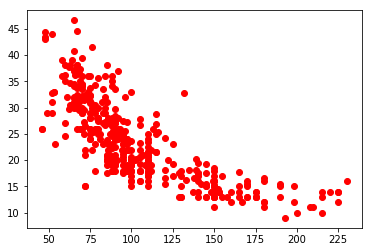

In [267]:
plt.plot(X,y, 'ro')

In [268]:
b1 = sum((X - X.mean())*(y - y.mean()))/sum(np.square(X - X.mean()))
b0 = y.mean() - b1 * X.mean()
pred_y = b0 + (b1 * X)

In [269]:
print('b0 = {}\nb1 = {}'.format(round(b0,2),round(b1,2)))

b0 = 39.94
b1 = -0.16


In [270]:
df['X_sq'] = np.square(X)

In [271]:
X2 = df[['horsepower', 'X_sq']]

In [272]:
X2 = X2.astype('float64')

In [273]:
from sklearn.linear_model import LinearRegression

In [274]:
lm = LinearRegression()

In [275]:
lm.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [276]:
pred_y_n = lm.predict(X2)

In [277]:
[X_plot,y_plot] = zip(*sorted(zip(X, pred_y_n), key=lambda pred_y_n: pred_y_n[0]))

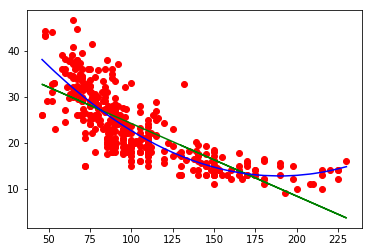

In [278]:
plt.plot(X,y, 'ro')
plt.plot(X,pred_y, 'g')
plt.plot(X_plot,y_plot,'b')

In [279]:
#Coefficient & Intercept
coef = lm.coef_
inter = lm.intercept_
RSE_squared = np.sum(np.square(y-pred_y_n))/(X2.shape[0] - X2.shape[1])
#standard errors
# standard_error = (np.square(y.std()))/X2.shape[0]
standard_error = np.array([np.sqrt(np.diagonal(RSE_squared * np.linalg.inv(np.dot(X2.T,X2))))])
Intercept_std_err = (np.sqrt((RSE_squared**2)*((1/X2.shape[0])+((X2.mean()**2)/(np.sum((X2-X2.mean())**2)))))).mean()
#t-statistic
Intercept_t_stat = inter / Intercept_std_err
t_stat = coef / standard_error
#p-values
Intercept_p_value = 2 * (1 - scipy.stats.t.cdf(np.abs(Intercept_t_stat), 30))
p_value = 2 * (1 - scipy.stats.t.cdf(np.abs(t_stat), 30))

In [280]:
Coefficients = np.hstack((inter, coef))
Std_err = np.hstack((Intercept_std_err,standard_error.reshape(2,)))
t_statistic = np.hstack((Intercept_t_stat,t_stat.reshape(2,)))
p_vals = np.hstack((Intercept_p_value,p_value.reshape(2,)))

In [281]:
data = np.array([Coefficients.round(4), 
                 Std_err.round(4), 
                 t_statistic.round(2), 
                 p_vals.round(5)])

In [282]:
pd.DataFrame(data.T, 
             columns=['Coefficient', 'Std. error', 't-statistic', 'p-value'], 
             index=['Intercept', 'horsepower', 'horsepower^2'])

,Coefficient,Std. error,t-statistic,p-value
Intercept,56.9001,2.1722,26.19,0.0
horsepower,-0.4662,0.0061,-75.82,0.0
horsepower^2,0.0012,0.0000,28.41,0.0


In [283]:
import statsmodels.api as sm
model = sm.OLS(y,X2).fit()

In [284]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1563.
Date:                Thu, 11 Apr 2019   Prob (F-statistic):          6.27e-187
Time:                        10:19:02   Log-Likelihood:                -1382.5
No. Observations:                 392   AIC:                             2769.
Df Residuals:                     390   BIC:                             2777.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower     0.4980      0.012     42.886      0.000       0.475       0.521
X_sq          -0.0024   8.18e-05    -29.036      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       34.442   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.889
Skew:                           0.801   Prob(JB):                     8.02e-10
Kurtosis:                       3.028   Cond. No.                         440.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [296]:
import seaborn as sns

Text(0,0.5,'Residuals')

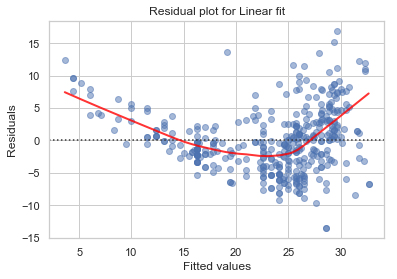

In [329]:
plo = plt.figure(1)
# plo = sns.set(style="whitegrid")

plo.axes[0] = sns.residplot(pred_y, (y-pred_y), lowess=True, scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
plo.axes[0].set_title('Residual plot for Linear fit')
plo.axes[0].set_xlabel('Fitted values')
plo.axes[0].set_ylabel('Residuals')

Text(0,0.5,'Residuals')

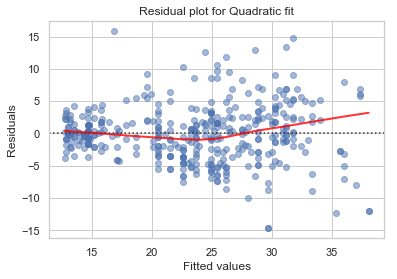

In [331]:
plo2 = plt.figure(1)
plo2.axes[0] = sns.residplot(pred_y_n, (y-pred_y_n), lowess=True, scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
plo2.axes[0].set_title('Residual plot for Quadratic fit')
plo2.axes[0].set_xlabel('Fitted values')
plo2.axes[0].set_ylabel('Residuals')